# Sistemas Inteligentes

## Laboratório 2 - Classificação

Neste laboratório serão introduzidos: **Linear Discriminant Analysis (LDA)**, **Support Vector Machine (SVM)** e **Artificial Neural Networks (ANN)**.

### Identificação do Aluno

#### Nome Completo

Joao Pedro Poloni Ponce

#### RA

11116513

In [5]:
import warnings
warnings.filterwarnings('ignore')

### Importação e preparação dos dados

Importe o pacote **datasets** da biblioteca **sklearn**, então carregue o dataset de imagens de dígitos, utilizando a função **load_digits()** do pacote de datasets importado, já atribuindo-o à variável **dataset**.

Tendo feito o processo adequadamente, a variável dataset conterá todo o dataset correspondente, inclusive com informações que não são de nosso interesse para esta atividade. Para selecionar apenas o que é de nosso interesse, atribua à variável X apenas o objeto images de dataset. Analogamente, atribua à variável y o objeto target.

Ainda nesta célula, utilize a função reshape do próprio X para forçar um formato unidimensional para cada imagem dentro do array X, que, originalmente, contém várias imagens com seus pixels distribuidos bidimensionalmente.

In [15]:
from sklearn import datasets
import numpy as np

dataset = datasets.load_digits()
x = dataset.images.reshape(-1,8*8)
y = dataset.target

#### Divisão dos dados em grupos para treinamento e teste.

Importe e utilize a função **train_test_split** (do pacote **model_selection**, que percente à biblioteca **sklearn**) para dividir os dados de entrada e saída, **digits** e **digits_target**, respectivamente, separando-os em dados de treinamento e de testes para entrada e saída, ou seja, **X_train**, **X_test**, **y_train** e **y_test**.

Separe 25% para testes utilizando o argumento *test_size* da própria função **train_test_split**.

In [16]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(x, y, test_size=0.25)

### Linear Discriminant Analysis (LDA)

#### Treinamento

Importe o classificador do LDA, que é uma função chamada **LinearDiscriminantAnalysis** do pacote **discriminant_analysis**, que faz parte da biblioteca **sklearn**. Então crie o classificador com o nome **LDA** atribundo a ele a função **LinearDiscriminantAnalysis**.

Treine o classificador **LDA** por meio de sua própria função **fit()**. Os argumentos da função **fit()** são os dados de entrada e saída de treinamento, ou seja, **X_train** e **y_train**.

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

#### Classificação e Resultados

Então, faça a classificação (também chamada de predição), utilizando a função **predict()** do próprio classificador **LDA**. O argumento da função é apenas a entrada de teste, ou seja, **X_test**. Atribua a saída dessa classificação à variável **y_pred_LDA**.

Para analisar os resultados, precisamos utilizar algumas ferramentas e métricas. A biblioteca **sklearn** possui um grande conjunto de funções para essa finalidade em seu pacote **metrics**. Importe as funções **accuracy_score** e **confusion_matrix**, então imprima a acurácia do classificador lda e sua confusion matrix.

In [22]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

y_pred_LDA = LDA.predict(X_test)
acuracia_LDA = accuracy_score(y_test, y_pred_LDA)
matriz_confusao_LDA = confusion_matrix(y_test, y_pred_LDA)

print("Acuracia: ", acuracia_LDA)
print("Matriz de confusao:")
print(matriz_confusao_LDA)

Acuracia:  0.9422222222222222
Matriz de confusao:
[[46  0  0  0  0  0  0  0  0  0]
 [ 0 47  0  0  0  0  0  0  2  1]
 [ 0  0 39  0  0  0  0  0  0  0]
 [ 0  0  0 50  0  2  0  0  1  1]
 [ 0  0  0  0 39  0  0  1  0  1]
 [ 0  0  0  0  0 39  0  1  0  4]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  2]
 [ 0  3  0  0  0  0  0  0 32  1]
 [ 0  0  0  1  0  0  0  2  2 51]]


### Support Vector Machine (SVM)

#### Treinamento

Importe a função **LinearSVC**, pertencente ao pacote **svm** da biblioteca **sklearn**, então crie o classificador chamado **SVM**, análogo ao que foi feito com o LDA anteriormente.

Então, treine o classificador **SVM** utilizando a função **fit** com os dados de treinamento, **X_train** e **y_train**, respectivamente.

In [24]:
from sklearn.svm import LinearSVC

SVM = LinearSVC()
SVM.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

#### Classificação e Resultados

Faça a classificação dos dados de entrada para testes, **X_test**, utilizando a função **predict** do próprio **SVM** e armazene os resultados em **y_pred_SVM**.

Na mesma célula, verifique a acurácia do classificador **SVM** por meio da função **accuracy_score** e mostre a matriz de confusão do classificador **SVM** utilizando a função **confusion_matrix**.

In [25]:
y_pred_SVM = SVM.predict(X_test)
acuracia_SVM = accuracy_score(y_test, y_pred_SVM)
matriz_confusao_SVM = confusion_matrix(y_test, y_pred_SVM)

print("Acuracia: ", acuracia_SVM)
print("Matriz de confusao:")
print(matriz_confusao_SVM)

Acuracia:  0.94
Matriz de confusao:
[[46  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  1  0  0  0  0  6  0]
 [ 0  0 39  0  0  0  0  0  0  0]
 [ 0  0  0 48  0  4  0  0  1  1]
 [ 0  0  0  0 40  0  0  0  0  1]
 [ 1  0  0  1  0 42  0  0  0  0]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  1  0  0 38  1  0]
 [ 0  2  0  1  0  0  0  0 33  0]
 [ 0  1  0  1  0  1  0  0  3 50]]


### Artificial Neural Networks (ANN)

#### Treinamento

Importe a função **MLPClassifier**, pertencente ao pacote **neural_network** da biblioteca **sklearn**, então crie o classificador **ANN** usando a função importada com os parâmetros e **hidden_layer_sizes=(50)**.

Depois, treine o classificador usando os dados de entrada e saída de treinamento.

In [27]:
from sklearn.neural_network import MLPClassifier

ANN = MLPClassifier(hidden_layer_sizes=(50))
ANN.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=50, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

#### Classificação e Resultados

Faça a predição com base nos dados de entrada de teste com o classificador **ANN**, atribundo as predições à variável **y_pred_ANN**. Então imprima a acurácia e a matriz de confusão dessa classificação.

In [28]:
y_pred_ANN = ANN.predict(X_test)
acuracia_ANN = accuracy_score(y_test, y_pred_ANN)
matriz_confusao_ANN = confusion_matrix(y_test, y_pred_ANN)

print("Acuracia: ", acuracia_ANN)
print("Matriz de confusao:")
print(matriz_confusao_ANN)

Acuracia:  0.9644444444444444
Matriz de confusao:
[[46  0  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  0  0  0  0  2  0]
 [ 0  0 39  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  2  0]
 [ 0  0  0  0 41  0  0  0  0  0]
 [ 1  0  0  1  0 39  0  0  0  3]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  1  0  0 38  1  0]
 [ 0  1  0  0  0  0  0  0 35  0]
 [ 0  0  0  1  0  1  0  1  0 53]]


#### Análise para diferentes quantidades de neurônios

Faça, iterativamente, com que seja treinada e testada uma rede neural de uma camada, utilizando uma quantidade crescente de neurônios, indo de 1 a 50. Armazene o valor da acurácia para cada iteração, então imprima as seguintes estatísticas sobre a acurácia: mínima, máxima, média, mediana, moda, variância e desvio padrão.

In [47]:
import statistics as stat
# from scipy import stats as stat

minimo = []
maximo = []
media = []
mediana = []
moda = []
variancia = []
std = []
acuracia = []

for i in range(1,50):
    ANN_it = MLPClassifier(hidden_layer_sizes=(i))
    ANN_it.fit(X_train, y_train)
    
    y_pred_ANN_it = ANN_it.predict(X_test)
    acuracia_ANN_it = accuracy_score(y_test, y_pred_ANN_it)
    matriz_confusao_ANN_it = confusion_matrix(y_test, y_pred_ANN_it)
    
    acuracia.append(acuracia_ANN_it)
    
    media.append(stat.mean(y_pred_ANN_it))
    mediana.append(stat.median(y_pred_ANN_it))
    try:
        moda.append(stat.mode(y_pred_ANN_it))
    except ValueError:
        print(ValueError)
    variancia.append(stat.variance(y_pred_ANN_it))
    std.append(stat.stdev(y_pred_ANN_it))
    minimo.append(min(y_pred_ANN_it))
    maximo.append(max(y_pred_ANN_it))

print("Maximo")
print(maximo)

print("Minimo")
print(minimo)

print("Media")    
print(media)

print("Mediana")
print(mediana)

print("Moda")
print(moda)

print("Variancia")
print(variancia)

print("Desvio")
print(std)

<class 'ValueError'>
<class 'ValueError'>
<class 'ValueError'>
<class 'ValueError'>
<class 'ValueError'>
Maximo
[8, 8, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
Minimo
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Media
[5, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Mediana
[6.0, 6.0, 5.0, 4.0, 3.0, 4.5, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.5, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
Moda
[6, 7, 5, 3, 0, 9, 3, 3, 9, 3, 3, 9, 9, 9, 9, 3, 9, 9, 9, 3, 9, 9, 9, 3, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
Variancia
[2, 7, 2, 6, 7, 8, 7, 8, 8, 8

Utilizando subplots, gere o gráfico da acurácia do classificador para cada quantidade de neurônios na camada da rede neural e o gráfico do erro, considerando como o erro a diferença entre as acurácias das últimas duas iterações para cada iteração.

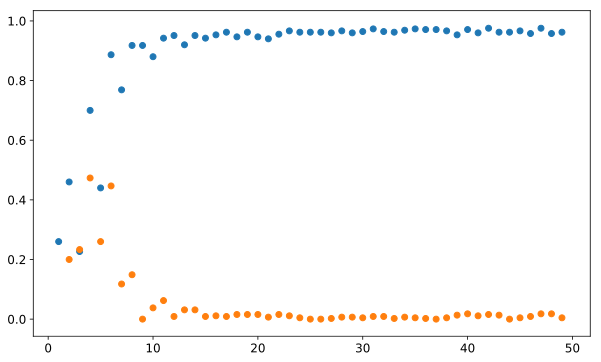

In [63]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

params = {'figure.figsize': [10, 6], 
          'axes.labelsize': 16,
          'axes.titlesize':18, 
          'font.size': 16,
          'legend.fontsize': 12, 
          'xtick.labelsize': 12, 
          'ytick.labelsize': 12
         }

plt.rcParams.update(params)

erro = []
plt.scatter(np.arange(1,50,1), acuracia, label="Acuracia")
for i in range(2,50):
    erro.append(abs(acuracia[i-1]-acuracia[i-2]))
    
plt.scatter(np.arange(2,50,1), erro, label="Erro")

## Referências

[Scikit-Learn - Datasets](http://scikit-learn.org/stable/datasets/index.html)

[Matplotlib - Pyplot](https://matplotlib.org/api/pyplot_summary.html)

[Numpy](https://docs.scipy.org/doc/numpy/reference/)

[Scikit-Learn - Train, Test and Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Scikit-Learn - LinearDiscriminantAnalysis](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

[Scikit-Learn - SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

[Scikit-Learn - MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

[Scikit-Learn - Accuracy Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Scikit-Learn - Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)